In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 배깅(Bagging)
- Bootstrap Aggregation. 앙상블 학습 방식 중 하나 
- 배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregration)하는 방법
- 데이터로부터 부트스트랩(복원 랜덤 샘플링)을 하고 부트스트랩한 데이터로 모델을 학습. 학습된 모델의 결과를 집계하여 최종 결과 값을 구한다.
- Categorical Data는 투표 방식(Votinig)으로 결과를 집계하며, Continuous Data는 평균으로 집계.
- Categorical Data일 때, 투표 방식으로 한다는 것은 전체 모델에서 예측한 값 중 가장 많은 값을 최종 예측값으로 선정. 
- 6개의 결정 트리 모델일 경우 4개는 A로 예측했고, 2개는 B로 예측했다면 투표에 의해 4개의 모델이 선택한 A를 최종 결과로 예측한다
- 평균으로 집계한다는 것은 말 그대로 각각의 결정 트리 모델이 예측한 값에 평균을 취해 최종 Bagging Model의 예측값을 결정한다
- 배깅 기법을 활용한 모델이 바로 랜덤 포레스트

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb4wG8O%2FbtqyfYW98AS%2FYZBtUJy3jZLyuik1R0aGNk%2Fimg.png' width='600'>

# 랜덤 포레스트(Random Forest)

- 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘. 
- 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 내린다.
- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트인데 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트 스트래핑(bootstrapping) 분할 방식이라고 한다. 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fod2gM%2Fbtq6kMv83oZ%2FsNVWEiA7FWsB2BBt6kn0r1%2Fimg.png'
      width='500'>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 타이타닉 데이타셋

In [5]:
titanic_df = pd.read_csv('data/titanic_book.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [6]:
titanic_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0


In [7]:
titanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [8]:
X_titanic_df = titanic_df.loc[:, 'Pclass':]
y_titanic_df = titanic_df['Survived']

### 학습 데이타와 테스트 데이타로 분리 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11,
                                                    stratify=y_titanic_df)

In [10]:
X_train.shape, X_test.shape

((712, 8), (179, 8))

### DecesionTree 모델 적용과 테스트

In [11]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
model_dt.score(X_test, y_test)

0.7821229050279329

In [12]:
# 그리드 서치 적용 => max_depth : 3
model_dt = DecisionTreeClassifier()
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
model_dt_grid = GridSearchCV(model_dt, param_grid=parameters, cv=5,  verbose=1)
model_dt_grid.fit(X_train, y_train)
model_dt_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 3}

In [13]:
model_dt = DecisionTreeClassifier(max_depth = 3)
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train), model_dt.score(X_test, y_test) 

(0.8132022471910112, 0.8659217877094972)

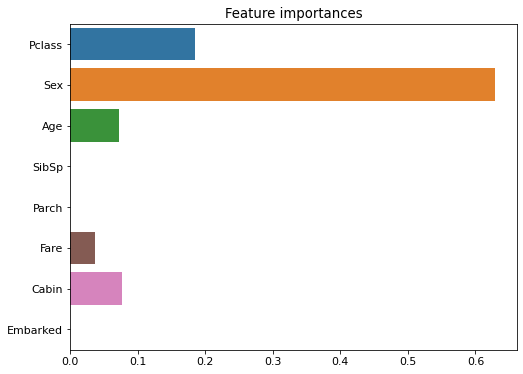

In [14]:
# 피처 중요도 Sex => Pclass
ftr_importances = pd.Series(model_dt.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

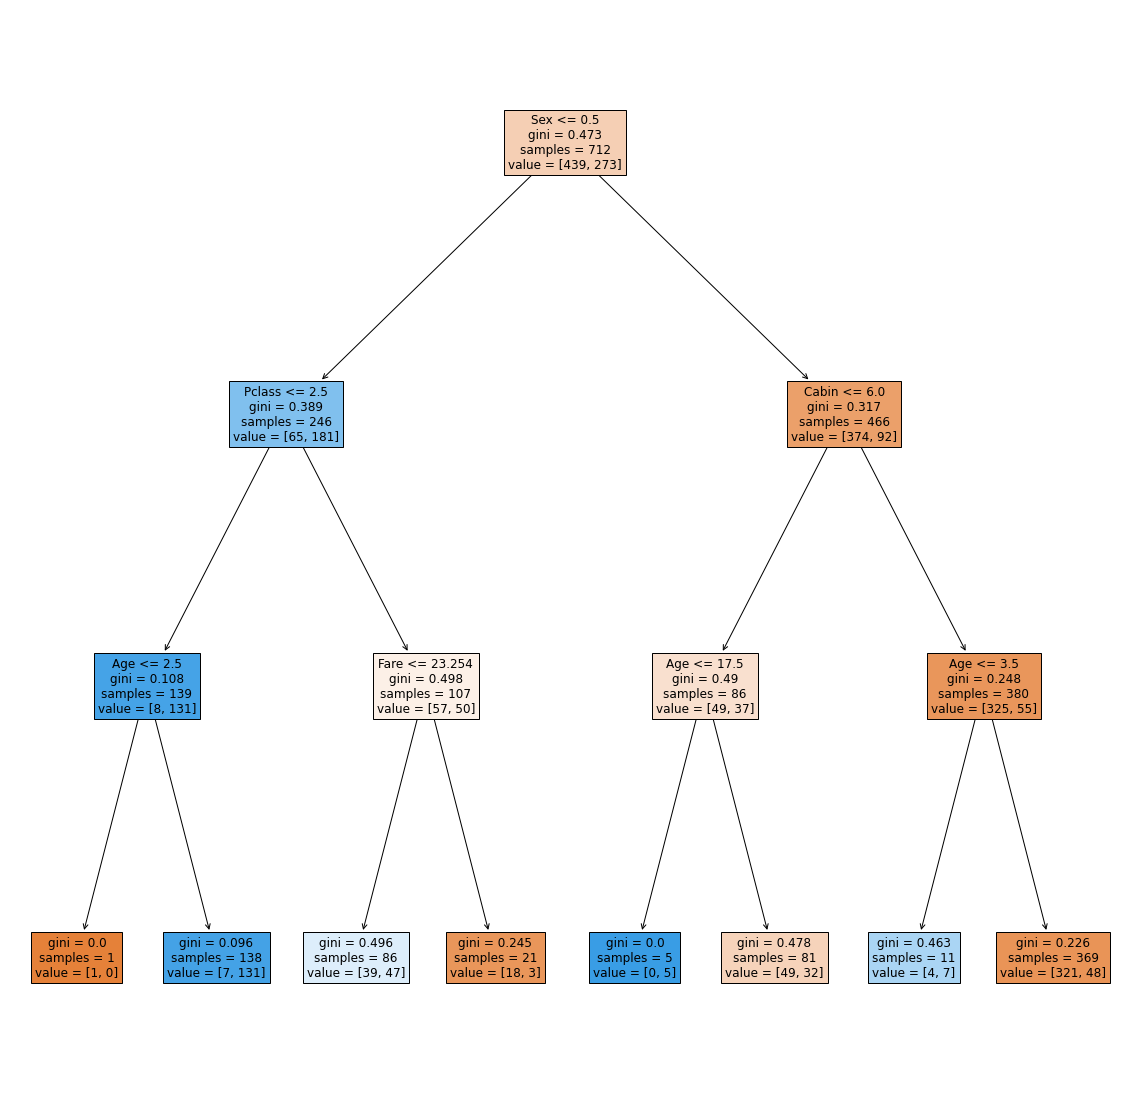

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model_dt, max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

### Random Forest 적용

In [32]:
# n_estimators=100 기본값 
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8268156424581006

In [33]:
model_rf = RandomForestClassifier()
parameters = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10]}
model_rf_grid = GridSearchCV(model_rf, param_grid=parameters, cv=5,  verbose=1)
model_rf_grid.fit(X_train, y_train)
model_rf_grid.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 6}

In [34]:
model_rf = RandomForestClassifier(max_depth = 8)
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.8547486033519553

In [35]:
model_rf.classes_ , model_rf.feature_importances_, X_train.columns

(array([0, 1], dtype=int64),
 array([0.09497033, 0.32674448, 0.16243434, 0.05346057, 0.04357363,
        0.19571511, 0.08476929, 0.03833226]),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object'))

In [36]:
importances_values = model_rf.feature_importances_
print(np.argsort(importances_values)[::-1])
X_train.columns[np.argsort(importances_values)[::-1][:]]

[1 5 2 0 6 3 4 7]


Index(['Sex', 'Fare', 'Age', 'Pclass', 'Cabin', 'SibSp', 'Parch', 'Embarked'], dtype='object')

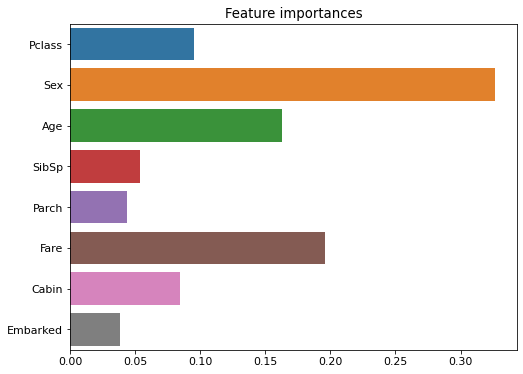

In [37]:
ftr_importances = pd.Series(model_rf.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

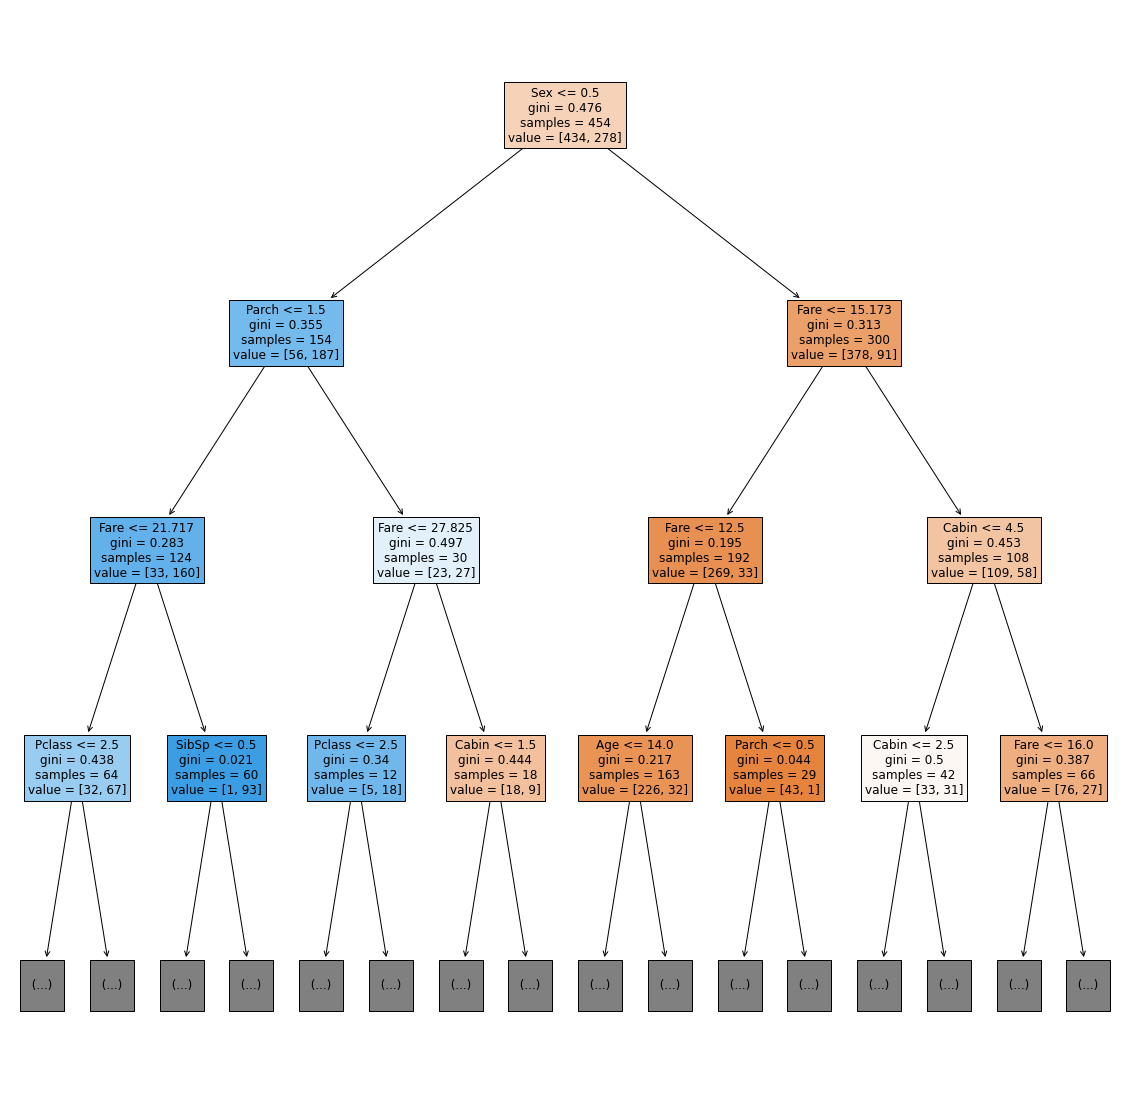

In [39]:
# 랜덤 포레스트 시각화 
# model_rf[0] ~ model_rf[n_estimators-1]
from sklearn.tree import plot_tree

# 첫번째 결정트리 
plt.figure(figsize=(20,20))
plot_tree(model_rf[0], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

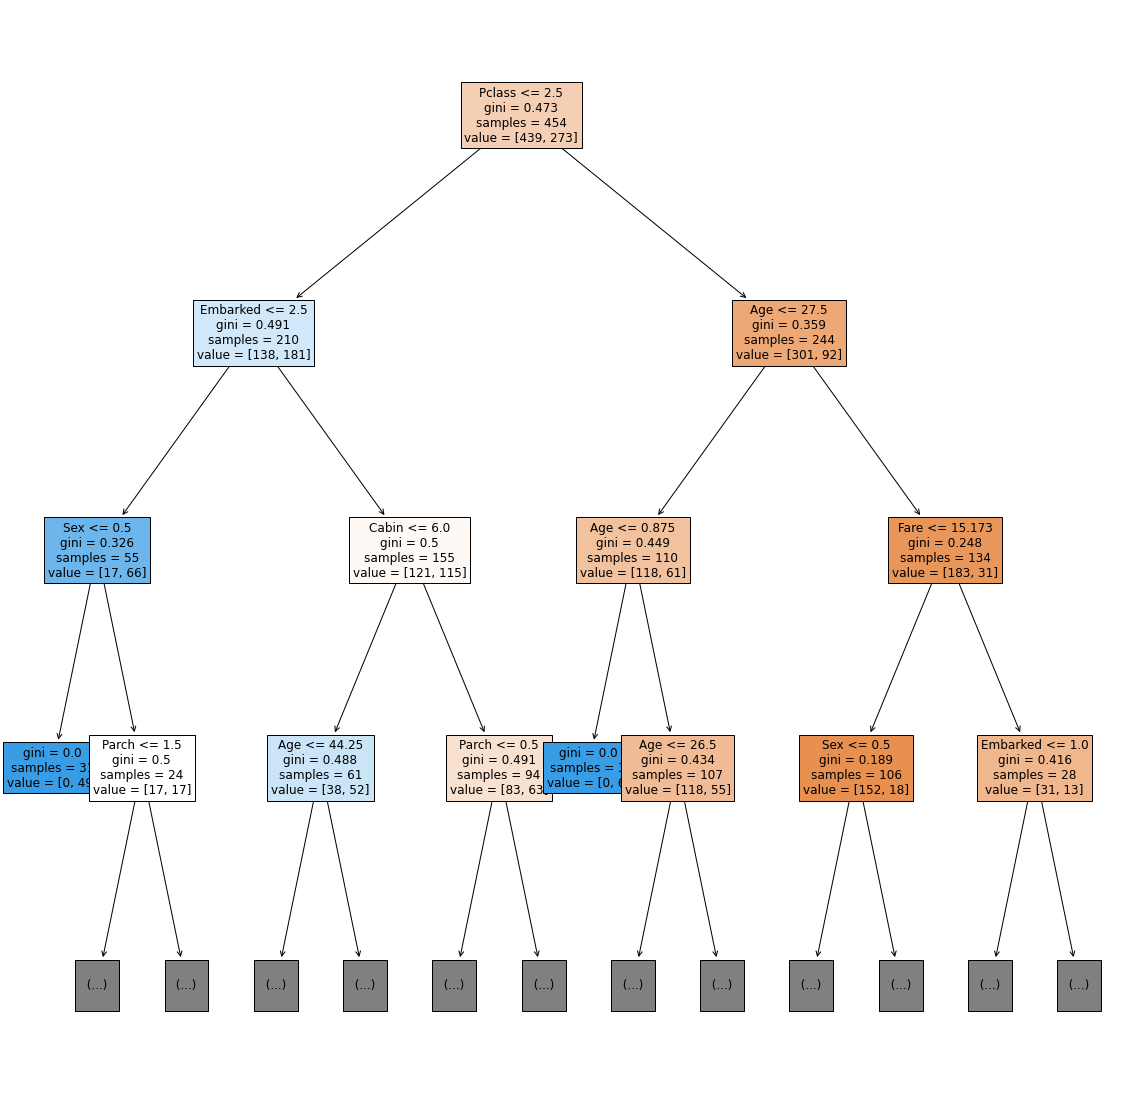

In [42]:
# 마지막 결정트리 
plt.figure(figsize=(20,20))
plot_tree(model_rf[99], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
plt.show()

# 부스팅(Boosting)
- 부스팅은 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법. 
- 배깅은 Deicison Tree1과 Decision Tree2가 서로 독립적으로 결과를 예측하며 여러 개의 독립적인 결정 트리가 각각 값을 예측한 뒤, 그 결과 값을 집계해 최종 결과 값을 예측하는 방식.
- 부스팅은 모델 간 팀워크가 이루어져 처음 모델이 예측을 하면 그 예측 결과에 따라 데이터에 가중치가 부여되고, 부여된 가중치가 다음 모델에 영향을 준다. 잘못 분류된 데이터에 집중하여 새로운 분류 규칙을 만드는 단계를 반복한다. 
- ADA Boosting, Gradient Boosting

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FkCejr%2FbtqyghvqEZB%2F9o3rKTEsuSIDHEfelYFJlk%2Fimg.png' width='600'>



# GBM

- Gradient Boosting Machine

- max_depth	: 트리의 최대 깊이. default = 3
- min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수. → 과적합을 제어하는데 사용
    <br> Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수.  
    <br> min_samples_split과 함께 과적합 제어 용도.  default = 1
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수.  Default = 'none' → 모든 피처 사용
- max_leaf_nodes : 리프노드의 최대 개수.  default = None → 제한없음
- n_estimators	: 생성할 트리의 갯수. Default = 100
- learning_rate	: 학습을 진행할 때마다 적용하는 학습률(0~1). 
    <br> Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수.  Default = 0.1
    <br> 낮은 만큼 최소 오류 값을 찾아 예측성능이 높아질 수 있음. 시간이 많이 소요
- subsample	: 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1). default=1 (전체 데이터 학습)
    <br> 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
model_gb.score(X_train, y_train), model_rf.score(X_test, y_test)

(0.9030898876404494, 0.8547486033519553)

In [44]:
model_gb = GradientBoostingClassifier()
parameters = {
    'n_estimators' : [50, 100, 300],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth':[3, 4, 5, 6]
}
model_gb_grid = GridSearchCV(model_gb, param_grid=parameters, cv=5,  verbose=1)
model_gb_grid.fit(X_train, y_train)
model_gb_grid.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [45]:
model_gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
model_gb.fit(X_train, y_train)
model_gb.score(X_test, y_test)

0.7988826815642458

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



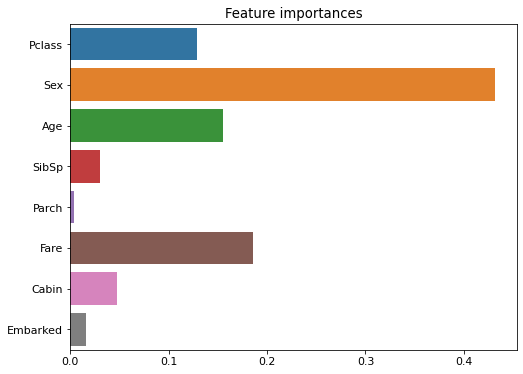

In [47]:
ftr_importances = pd.Series(model_gb.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

In [49]:
# 첫번째 결정트리 
# plt.figure(figsize=(20,20))
# plot_tree(model_gb[0], max_depth=3, filled=True, feature_names=X_train.columns, fontsize=12)
# plt.show()

# XGBoost
- 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나
- GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘
- 과적합 규제(Overfitting Regularization)
- sklearn 모듈이 아님. 별도 설치 요망 

In [ ]:
# pip list

### 설치 

- sklearn 에서 지원되지 않으므로 별도 설치가 필요 
- 관리자 버전으로 설치 
- pip install xgboost
- conda install -c anaconda py-xgboost

### 주요 파라미터 
: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터를 지칭

In [51]:
# pip list

In [52]:
import xgboost
from xgboost import plot_importance, XGBClassifier 

xgboost.__version__

'1.5.1'

### 데이터 셋 - 위스콘신 Breast Cancer 

In [53]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label

print(cancer_df.shape)
cancer_df.head(3)

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [54]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [55]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [56]:
# cancer_df.isnull().sum()
cancer_df.isnull().sum().sum()

0

In [57]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### 데이타셋 분리

In [58]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


### 모델 생성 및 학습

In [67]:
# 스케일링 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# X_train[:3]

In [71]:
model_xgb = XGBClassifier()
# 오류 발생시 아래와 같이 변경 
# model_xgb = XGBClassifier(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

[11:25:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.956140350877193

In [70]:
# 스케일링 전 
# 0.956140350877193

In [62]:
print(classification_report(y_test, model_xgb.predict(X_test)))
confusion_matrix(y_test, model_xgb.predict(X_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.96      0.97      0.97        77

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



array([[34,  3],
       [ 2, 75]], dtype=int64)

In [63]:
model_xgb = XGBClassifier(n_estimators=10)
params = {
    'max_depth':[3, 5, 7, 9],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
}
model_xgb_gridcv = GridSearchCV(model_xgb, param_grid=params)
model_xgb_gridcv.fit(X_train,
           y_train,
           eval_set=[(X_test, y_test)],
           eval_metric="error")
print('GridSearchCV 최적 파라미터:', model_xgb_gridcv.best_params_)

[0]	validation_0-error:0.05263
[1]	validation_0-error:0.05263
[2]	validation_0-error:0.05263
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.05263
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.07895
[1]	validation_0-error:0.07895
[2]	validation_0-error:0.07895
[3]	validation_0-error:0.07895
[4]	validation_0-error:0.07895
[5]	validation_0-error:0.07895
[6]	validation_0-error:0.07895
[7]	validation_0-error:0.07895
[8]	validation_0-error:0.07895
[9]	validation_0-error:0.07895
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.08772
[2]	validation_0-error:0.08772
[3]	validation_0-error:0.08772
[4]	validation_0-error:0.08772
[5]	validation_0-error:0.08772
[6]	validation_0-error:0.08772
[7]	validation_0-error:0.08772
[8]	validation_0-error:0.08772
[9]	validation_0-error:0.08772
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	vali

[5]	validation_0-error:0.07018
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07018
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.08772
[2]	validation_0-error:0.08772
[3]	validation_0-error:0.08772
[4]	validation_0-error:0.08772
[5]	validation_0-error:0.08772
[6]	validation_0-error:0.08772
[7]	validation_0-error:0.08772
[8]	validation_0-error:0.08772
[9]	validation_0-error:0.08772
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.07018
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07018
[0]	validation_0-error:0.11403
[1]	validation_0-error:0.11403
[2]	validation_0-error:0.11403
[3]	validation_0-error:0.11403
[4]	validation_0-error:0.11403
[5]	validation_0-error:0.11403
[6]	validation_0-error:0.11403
[7]	vali

[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.07018
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07018
[0]	validation_0-error:0.11403
[1]	validation_0-error:0.11403
[2]	validation_0-error:0.11403
[3]	validation_0-error:0.11403
[4]	validation_0-error:0.11403
[5]	validation_0-error:0.11403
[6]	validation_0-error:0.11403
[7]	validation_0-error:0.11403
[8]	validation_0-error:0.11403
[9]	validation_0-error:0.11403
[0]	validation_0-error:0.05263
[1]	validation_0-error:0.05263
[2]	validation_0-error:0.05263
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.05263
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	vali

[5]	validation_0-error:0.08772
[6]	validation_0-error:0.07018
[7]	validation_0-error:0.06140
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.05263
[1]	validation_0-error:0.05263
[2]	validation_0-error:0.05263
[3]	validation_0-error:0.04386
[4]	validation_0-error:0.02632
[5]	validation_0-error:0.02632
[6]	validation_0-error:0.03509
[7]	validation_0-error:0.03509
[8]	validation_0-error:0.02632
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.07895
[1]	validation_0-error:0.07895
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.07018
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07895
[3]	validation_0-error:0.06140
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.06140
[6]	validation_0-error:0.06140
[7]	vali

[0]	validation_0-error:0.07018
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07018
[3]	validation_0-error:0.05263
[4]	validation_0-error:0.05263
[5]	validation_0-error:0.05263
[6]	validation_0-error:0.05263
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.08772
[1]	validation_0-error:0.07018
[2]	validation_0-error:0.07895
[3]	validation_0-error:0.07895
[4]	validation_0-error:0.07018
[5]	validation_0-error:0.07018
[6]	validation_0-error:0.06140
[7]	validation_0-error:0.05263
[8]	validation_0-error:0.05263
[9]	validation_0-error:0.05263
[0]	validation_0-error:0.07018
[1]	validation_0-error:0.06140
[2]	validation_0-error:0.06140
[3]	validation_0-error:0.06140
[4]	validation_0-error:0.06140
[5]	validation_0-error:0.06140
[6]	validation_0-error:0.06140
[7]	validation_0-error:0.07018
[8]	validation_0-error:0.07018
[9]	validation_0-error:0.07018
[0]	validation_0-error:0.11403
[1]	validation_0-error:0.08772
[2]	vali

In [64]:
# model_xgb = XGBClassifier(objective='reg:squarederror', n_estimators=10, learning_rate=0.2, max_depth=3)
model_xgb = XGBClassifier(n_estimators=10, learning_rate=0.2, max_depth=3)
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

[11:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.956140350877193

In [65]:
ftr_importance_values = model_xgb.feature_importances_
ftr_importances = pd.Series(ftr_importance_values, index=dataset.feature_names)
ftr_importances = ftr_importances.sort_values(ascending=False)
ftr_importances

worst radius               0.418595
worst perimeter            0.269065
worst area                 0.116969
worst concave points       0.050433
mean concave points        0.039087
concave points error       0.017297
mean compactness           0.014485
mean texture               0.013644
worst texture              0.013261
worst smoothness           0.008630
worst compactness          0.008122
radius error               0.007495
worst symmetry             0.006395
worst concavity            0.005731
area error                 0.005499
perimeter error            0.004113
mean smoothness            0.001179
fractal dimension error    0.000000
mean radius                0.000000
compactness error          0.000000
symmetry error             0.000000
concavity error            0.000000
smoothness error           0.000000
texture error              0.000000
mean fractal dimension     0.000000
mean symmetry              0.000000
mean concavity             0.000000
mean area                  0

<AxesSubplot:>

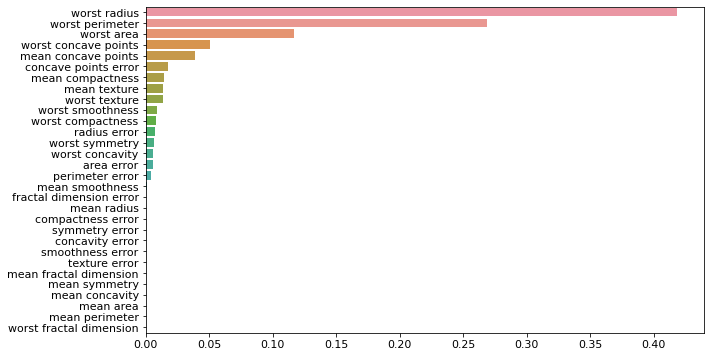

In [66]:
sns.barplot(x=ftr_importances, y=ftr_importances.index)

# 퀴즈 
타이타닉 데이타를 XGBClassifier() 를 이용해서 모델을 생성하고 테스트하여라 